In [107]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer                      
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

## Featureset Exploration
### Input Data fields (Features and Labels)
The input data consists of 390 samples collected from 253 doctors.
This data will be used for training and validation test in a file
named medical attached with the project proposal.
Every sample consists of 7 features and 1 label(the output target).
* **medicine:** The commercial name of the medicine that I refer to it as type1 to type6.
* **Price:** price for every drug of these 6 drugs for patient.
* **exam_price:** examination price that the doctor takes from the patient.
* **clinic_hos:** classification if this doctor has a private 'clinic' or works in a 'hospital'.
* **dr_class:** doctor class was classified according to number of patients for every doctor and how much is this doctor famous and it was classified to 'a' and 'b'.

**where:**

* **class a:** are doctors with high patient rate
* **class b:** are doctors with medium patient rate
* **area:** every medical representative cover some areas in a city where the medical representative has to make a lot of visits for alot of doctors in different places and I refer to each area with the name (area1 to area8)with total 8 areas that I have covered to make my prospection.
* **specialty:** the specialty of the doctor is one of the most important features because it will determine which of the 6 drugs will be suitable for this doctor to write it in his prescription. 

**These specialties are:**
* **Chest:** chest specialist
* **Im:** internal medicine specialist
* **Cd:** cardiology specialist
* **Neuro:** neurology specialist
* **Git:** gastrointestinal tract specialist
* **Ent:** ear, nose and throat specialist
* **Sur:** surgery specialist
* **Uro:** urology specialist
* **Gp:** general practitioner
* **Or:** orthopedic specialist
* **Vas:** vascular specialst

**With total 11 specialties.**

* **Target (label):** just one target to classify if this doctor write any of these drugs in prescription to his patients or not. With (1) if the doctor writes the drug in his prescription and (0)if not.

In [131]:
data = pd.read_csv('training.txt')
test = pd.read_csv('testing.txt')
data.head()

,medicine,area,speciality,price,dr_class,exam_price,clinic_hos,write
0,type1,area1,chest,45,a,200,clinic,1
1,type4,area2,im,36,b,100,clinic,1
2,type1,area8,chest,45,a,75,hospital,1
3,type1,area5,chest,45,a,30,hospital,1
4,type5,area6,uro,29,a,220,clinic,0


In [139]:
Y = data['write']
X = data.drop('write', axis = 1)

In [140]:
Y_test = test['write']
X_test = test.drop('write', axis = 1)

In [110]:
print('Info X \n', X.info(),'\n')
print('Describe X \n', X.describe(),'\n')
print('Value counts X \n', X.value_counts(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   medicine    390 non-null    object
 1   area        390 non-null    object
 2   speciality  390 non-null    object
 3   price       390 non-null    int64 
 4   dr_class    390 non-null    object
 5   exam_price  390 non-null    int64 
 6   clinic_hos  390 non-null    object
dtypes: int64(2), object(5)
memory usage: 21.5+ KB
Info X 
 None 

Describe X 
             price  exam_price
count  390.000000  390.000000
mean    35.715385  121.205128
std      8.751263   86.729844
min     20.000000   30.000000
25%     29.000000   50.000000
50%     36.000000   80.000000
75%     45.000000  170.000000
max     45.000000  350.000000 

Value counts X 
 medicine  area   speciality  price  dr_class  exam_price  clinic_hos
type1     area5  im          45     b         30          hospital      10
                 git   

In [80]:
print('Info Y \n', Y.info(),'\n')
print('Describe Y \n', Y.describe(),'\n')


<class 'pandas.core.series.Series'>
RangeIndex: 390 entries, 0 to 389
Series name: write
Non-Null Count  Dtype
--------------  -----
390 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
Info Y 
 None 

Describe Y 
 count    390.000000
mean       0.587179
std        0.492974
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: write, dtype: float64 



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25216\450153041.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

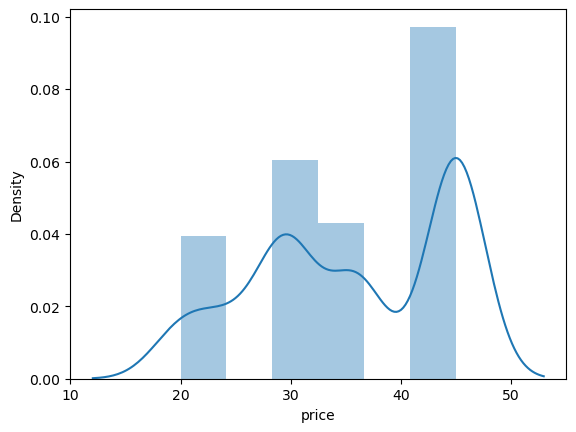

In [81]:
#sns.boxplot(x=data['price'])
sns.distplot(data['price'])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25216\3872631376.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['exam_price'])


<Axes: xlabel='exam_price', ylabel='Density'>

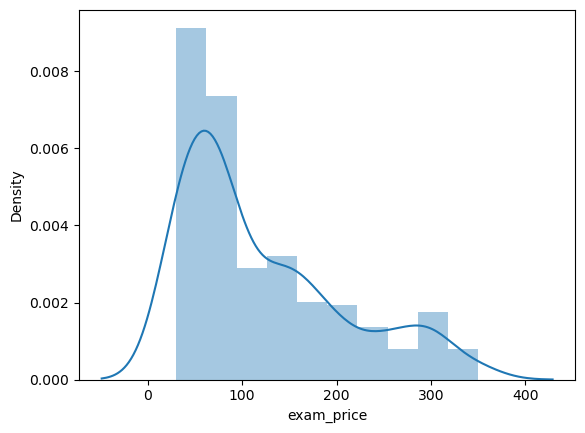

In [82]:
#sns.boxplot(x=data['exam_price'])
sns.distplot(data['exam_price'])


In [141]:
X_hot = pd.get_dummies(X)
X_test_hot = pd.get_dummies(X_test)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_hot, Y, test_size=0.20, random_state=42)

In [135]:
cv_sets = ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)
scorer = make_scorer(f1_score)

In [136]:
Tree = DecisionTreeClassifier(random_state=42)
Tree.fit(X_train,y_train)
y_Tree = Tree.predict(X_test)
accuracy = accuracy_score(y_test, y_Tree)
#print('accuracy =',accuracy)
#print("F-score testing data: {:.4f}".format(f1_score(y_test, y_Tree)))

hyper_parameters_1 = {'max_depth':[3,4,5,7],'min_samples_leaf':[8,9,10,11], 'min_samples_split':[2,3,4,5,6], 'random_state' :[42]}
grid_Tree = GridSearchCV(Tree, hyper_parameters_1, scoring=scorer, cv=cv_sets)
grid_fit_Tree = grid_Tree.fit(X_train, y_train)
best_Tree = grid_fit_Tree.best_estimator_
best_Tree.fit(X_train, y_train)

best_train_predictions = best_Tree.predict(X_train)
best_test_predictions = best_Tree.predict(X_test)

print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))
train_accuracy = accuracy_score(y_train, best_train_predictions)
test_accuracy = accuracy_score(y_test,best_test_predictions )
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

best_Tree

The training F1 Score is 0.7921348314606742
The testing F1 Score is 0.6938775510204082
The training accuracy is 0.7628205128205128
The test accuracy is 0.6153846153846154


DecisionTreeClassifier(max_depth=4, min_samples_leaf=9, random_state=42)

In [ ]:
Rf = RandomForestClassifier(random_state=42)
Rf.fit(X_train,y_train)
y_Rf = Rf.predict(X_test)
accuracy = accuracy_score(y_test, y_Rf)
print('accuracy =',accuracy)
print("F-score testing data: {:.4f}".format(f1_score(y_test, y_Rf)))

#hyper_parameters_2 = {'max_depth' :[2,6,10],'min_samples_leaf' :[50,100],'min_samples_split' :[100,200],'n_estimators' :[50,100,200], 'max_features': [5,10,24]}
#grid_Rf = GridSearchCV(Rf, hyper_parameters_2, scoring=scorer, cv=cv_sets)
#grid_fit_Rf = grid_Rf.fit(X_train, y_train)
#best_Rf = grid_fit_Rf.best_estimator_
#best_Rf.fit(X_train, y_train)


In [116]:
Ada = AdaBoostClassifier(random_state=42)
Ada.fit(X_train,y_train)
y_Ada = Ada.predict(X_test)
accuracy = accuracy_score(y_test, y_Ada)
print('accuracy =',accuracy)
print("F-score testing data: {:.4f}".format(f1_score(y_test, y_Ada)))

#hyper_parameters_3 = {'learning_rate' :[0.01,0.1,1], 'n_estimators' :[100,500,1000],'random_state' :[42]}
#grid_Ada = GridSearchCV(Ada, hyper_parameters_3, scoring=scorer, cv=cv_sets)
#grid_fit_Ada = grid_Ada.fit(X_train, y_train)
#best_Ada = grid_fit_Ada.best_estimator_
#best_Ada.fit(X_train, y_train)


accuracy = 0.6794871794871795
F-score testing data: 0.7475


In [117]:
SVC = SVC(random_state=42)
SVC.fit(X_train,y_train)
y_SVC = SVC.predict(X_test)
accuracy = accuracy_score(y_test, y_SVC)
print('accuracy =',accuracy)
print("F-score testing data: {:.4f}".format(f1_score(y_test, y_SVC)))

#hyper_parameters_4 = {'C':[10,12,15,17,18,20], 'kernel':['rbf'], 'gamma':[0.01,0.1,10,0.001,0.0001,0.00001]}
#grid_SVC = GridSearchCV(SVC, hyper_parameters_3, scoring=scorer, cv=cv_sets)
#grid_fit_SVC = grid_SVC.fit(X_train, y_train)
#best_SVC = grid_fit_SVC.best_estimator_
#best_SVC.fit(X_train, y_train)


accuracy = 0.6794871794871795
F-score testing data: 0.7748
